In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import warnings 
warnings.filterwarnings('ignore')
lb=LabelEncoder()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data\Employee_dataset.csv')

In [3]:
df.head()

,Employee_ID,First_Name,Last_Name,Age,Department_Region,Status,Join_Date,Salary,Email,Phone,Performance_Score,Remote_Work
0,EMP1000,Bob,Davis,25.0,DevOps-California,Active,4/2/2021,59767.65,bob.davis@example.com,-1651623197,Average,True
1,EMP1001,Bob,Brown,NaN,Finance-Texas,Active,7/10/2020,65304.66,bob.brown@example.com,-1898471390,Excellent,True
2,EMP1002,Alice,Jones,NaN,Admin-Nevada,Pending,12/7/2023,88145.90,alice.jones@example.com,-5596363211,Good,True
3,EMP1003,Eva,Davis,25.0,Admin-Nevada,Inactive,11/27/2021,69450.99,eva.davis@example.com,-3476490784,Good,True
4,EMP1004,Frank,Williams,25.0,Cloud Tech-Florida,Active,1/5/2022,109324.61,frank.williams@example.com,-1586734256,Poor,False


In [4]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_ID        1020 non-null   object 
 1   First_Name         1020 non-null   object 
 2   Last_Name          1020 non-null   object 
 3   Age                809 non-null    float64
 4   Department_Region  1020 non-null   object 
 5   Status             1020 non-null   object 
 6   Join_Date          1020 non-null   object 
 7   Salary             996 non-null    float64
 8   Email              1020 non-null   object 
 9   Phone              1020 non-null   int64  
 10  Performance_Score  1020 non-null   object 
 11  Remote_Work        1020 non-null   bool   
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 88.8+ KB
None


In [5]:
print(df.shape)

(1020, 12)


In [6]:
df.isnull().sum()

Employee_ID            0
First_Name             0
Last_Name              0
Age                  211
Department_Region      0
Status                 0
Join_Date              0
Salary                24
Email                  0
Phone                  0
Performance_Score      0
Remote_Work            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

Employee_ID          1020
First_Name              8
Last_Name               8
Age                     4
Department_Region      36
Status                  3
Join_Date             760
Salary                978
Email                  64
Phone                1020
Performance_Score       4
Remote_Work             2
dtype: int64

In [9]:
print("Categories in 'Age' variable:  " ,end=" ")
print(df['Age'].unique())

print("Categories in 'Status' variable:  " ,end=" ")
print(df['Status'].unique())

print("Categories in 'Performance_Score' variable:  " ,end=" ")
print(df['Performance_Score'].unique())

print("Categories in 'Remote_Work ' variable:  " ,end=" ")
print(df['Remote_Work'].unique())

print("Categories in 'Department_Region ' variable:  " ,end=" ")
print(df['Department_Region'].unique())

Categories in 'Age' variable:   [25. nan 40. 30. 35.]
Categories in 'Status' variable:   ['Active' 'Pending' 'Inactive']
Categories in 'Performance_Score' variable:   ['Average' 'Excellent' 'Good' 'Poor']
Categories in 'Remote_Work ' variable:   [ True False]
Categories in 'Department_Region ' variable:   ['DevOps-California' 'Finance-Texas' 'Admin-Nevada' 'Cloud Tech-Florida'
 'Sales-Texas' 'DevOps-New York' 'Cloud Tech-New York' 'HR-New York'
 'Finance-California' 'Sales-Florida' 'DevOps-Illinois'
 'Cloud Tech-Nevada' 'Admin-Illinois' 'Cloud Tech-Illinois'
 'Sales-Illinois' 'Finance-Nevada' 'Admin-Texas' 'Sales-New York'
 'Finance-Florida' 'Admin-California' 'HR-Texas' 'HR-California'
 'HR-Nevada' 'Cloud Tech-Texas' 'Sales-California' 'HR-Illinois'
 'Admin-New York' 'Admin-Florida' 'HR-Florida' 'Sales-Nevada'
 'Finance-New York' 'DevOps-Florida' 'DevOps-Texas' 'Finance-Illinois'
 'Cloud Tech-California' 'DevOps-Nevada']


In [10]:
corr = df.corr(numeric_only=True)

for col1 in corr.columns:
    for col2 in corr.columns:
        if col1 != col2:
            val = corr.loc[col1, col2]
            
            if val > 0:
                relation = "positive"
            elif val < 0:
                relation = "negative"
            else:
                relation = "no"  # for exactly 0
            
            # Print for ALL correlations (moved outside if/elif)
            print(f"{col1} and {col2} have a {relation} correlation of {val:.2f}")

Age and Salary have a positive correlation of 0.09
Age and Phone have a positive correlation of 0.05
Age and Remote_Work have a positive correlation of 0.02
Salary and Age have a positive correlation of 0.09
Salary and Phone have a negative correlation of -0.06
Salary and Remote_Work have a negative correlation of -0.03
Phone and Age have a positive correlation of 0.05
Phone and Salary have a negative correlation of -0.06
Phone and Remote_Work have a positive correlation of 0.02
Remote_Work and Age have a positive correlation of 0.02
Remote_Work and Salary have a negative correlation of -0.03
Remote_Work and Phone have a positive correlation of 0.02


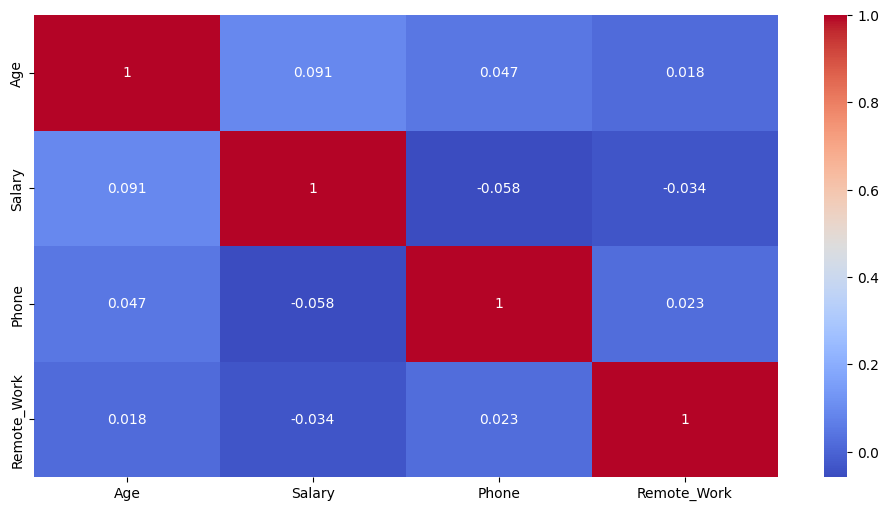

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

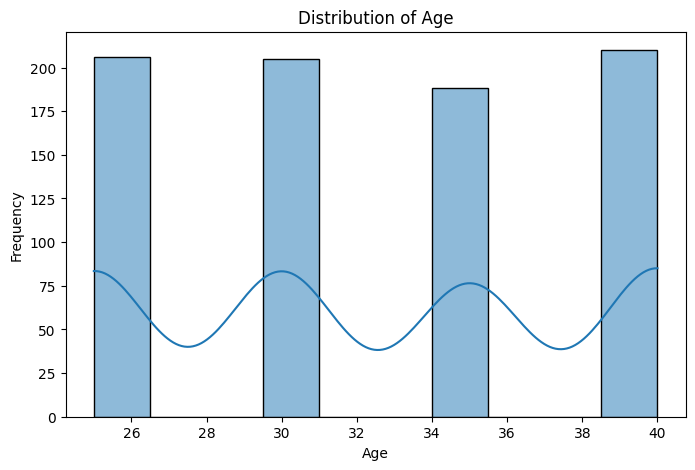

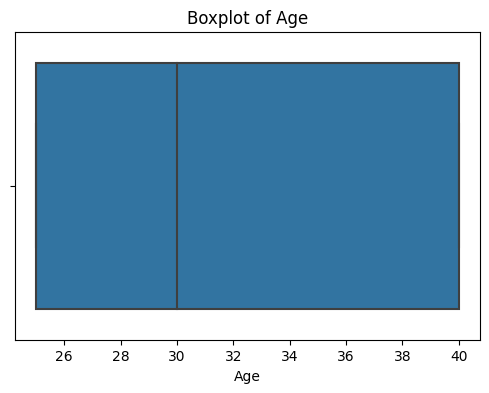

In [12]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

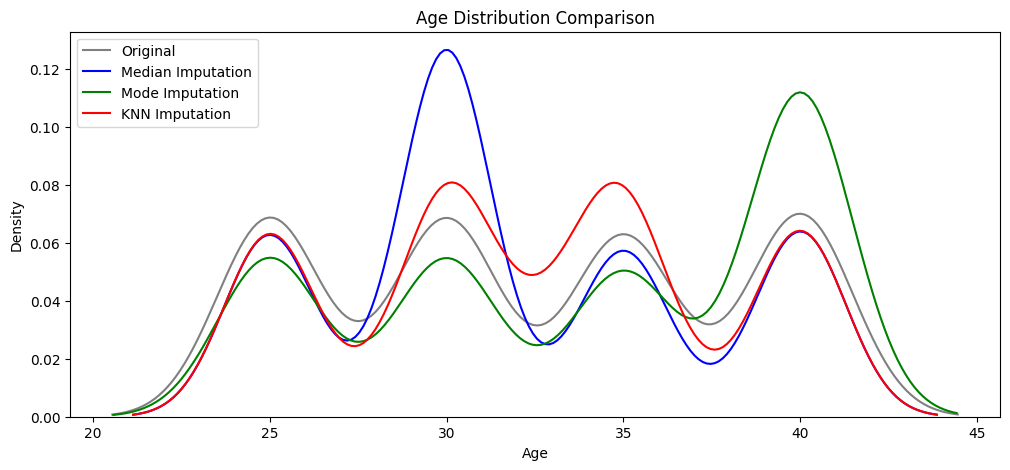

In [13]:

df_median = df.copy()
df_mode = df.copy()
df_knn = df.copy()

df_median['Age'] = df_median['Age'].fillna(df_median['Age'].median())

df_mode['Age'] = df_mode['Age'].fillna(df_mode['Age'].mode()[0])

df_knn_encoded = df_knn.copy()

categorical_cols = ['Department_Region', 'Status', 'Performance_Score', 'Remote_Work']
for col in categorical_cols:
    df_knn_encoded[col] = LabelEncoder().fit_transform(df_knn_encoded[col])

imputer = KNNImputer(n_neighbors=5)
df_knn_encoded[['Age']] = imputer.fit_transform(df_knn_encoded[['Age'] + categorical_cols])[:,0].reshape(-1,1)

plt.figure(figsize=(12,5))
sns.kdeplot(df['Age'], label='Original', color='gray')
sns.kdeplot(df_median['Age'], label='Median Imputation', color='blue')
sns.kdeplot(df_mode['Age'], label='Mode Imputation', color='green')
sns.kdeplot(df_knn_encoded['Age'], label='KNN Imputation', color='red')
plt.title('Age Distribution Comparison')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [14]:
df_copy=df.copy()

In [15]:
df_copy.head()

,Employee_ID,First_Name,Last_Name,Age,Department_Region,Status,Join_Date,Salary,Email,Phone,Performance_Score,Remote_Work
0,EMP1000,Bob,Davis,25.0,DevOps-California,Active,4/2/2021,59767.65,bob.davis@example.com,-1651623197,Average,True
1,EMP1001,Bob,Brown,NaN,Finance-Texas,Active,7/10/2020,65304.66,bob.brown@example.com,-1898471390,Excellent,True
2,EMP1002,Alice,Jones,NaN,Admin-Nevada,Pending,12/7/2023,88145.90,alice.jones@example.com,-5596363211,Good,True
3,EMP1003,Eva,Davis,25.0,Admin-Nevada,Inactive,11/27/2021,69450.99,eva.davis@example.com,-3476490784,Good,True
4,EMP1004,Frank,Williams,25.0,Cloud Tech-Florida,Active,1/5/2022,109324.61,frank.williams@example.com,-1586734256,Poor,False


In [16]:
if "Department_Region" in df.columns:
    df_region=df_copy["Department_Region"].str.split("-",n=1,expand=True)
    df_copy["Department"]=df_region[0]
    df_copy["Region"]=df_region[1]

In [17]:
df_copy=pd.DataFrame(df_copy)

In [18]:
df_copy=df_copy.drop(columns=["Phone", "Email","Department_Region"])

In [19]:
df_copy.head()

,Employee_ID,First_Name,Last_Name,Age,Status,Join_Date,Salary,Performance_Score,Remote_Work,Department,Region
0,EMP1000,Bob,Davis,25.0,Active,4/2/2021,59767.65,Average,True,DevOps,California
1,EMP1001,Bob,Brown,NaN,Active,7/10/2020,65304.66,Excellent,True,Finance,Texas
2,EMP1002,Alice,Jones,NaN,Pending,12/7/2023,88145.90,Good,True,Admin,Nevada
3,EMP1003,Eva,Davis,25.0,Inactive,11/27/2021,69450.99,Good,True,Admin,Nevada
4,EMP1004,Frank,Williams,25.0,Active,1/5/2022,109324.61,Poor,False,Cloud Tech,Florida


<Axes: >

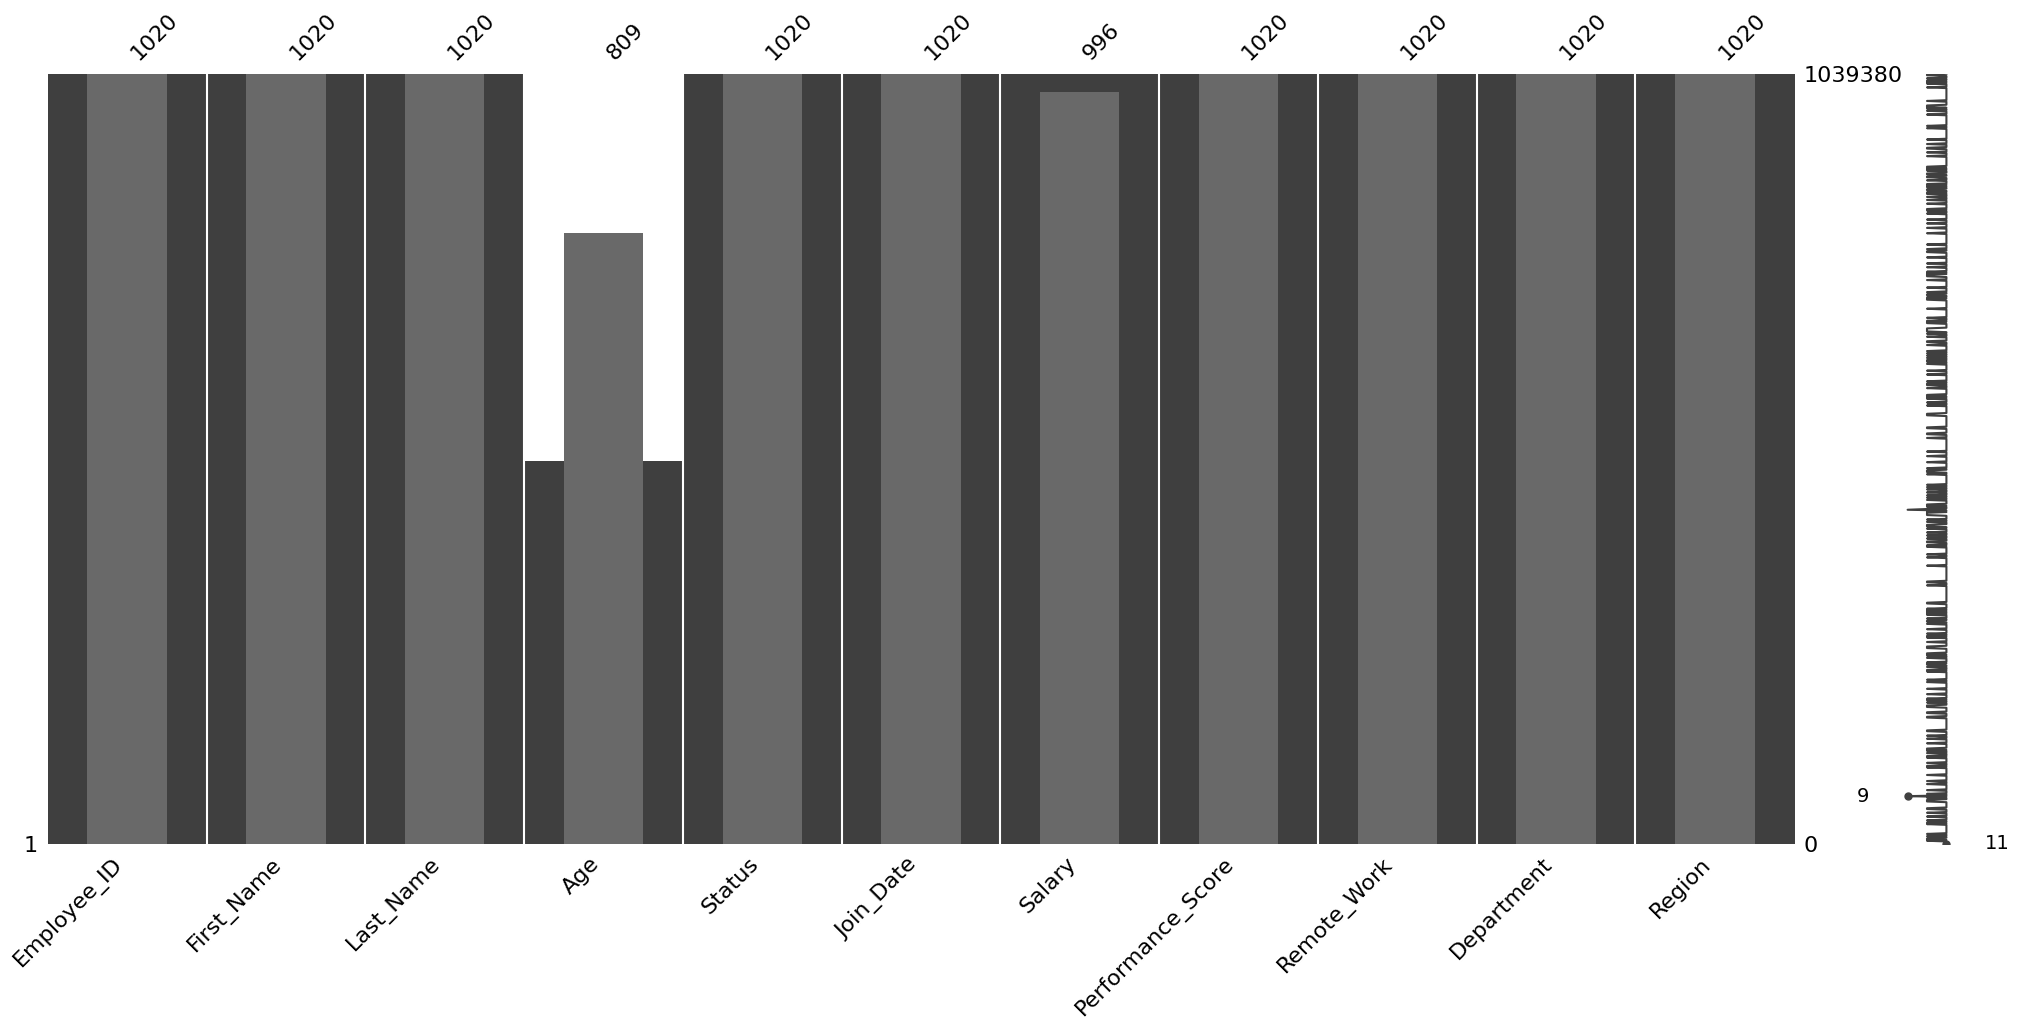

In [20]:
import missingno as msno
msno.matrix(df_copy)
msno.bar(df_copy)

In [21]:
df_copy["Status_code"]=df_copy["Status"].map({"Active":1 ,"Inactive":0 ,"Pending":2})

In [22]:
df_copy["Remote_Work_code"]=df_copy["Remote_Work"].astype(int)

In [23]:
perform_ord=["Poor", "Average", "Good", "Excellent"]
df_copy["Performance_Score_code"]=pd.Categorical(df_copy["Performance_Score"], categories=perform_ord,ordered=True).codes

In [24]:

df_copy["Department_Code"] = lb.fit_transform(df_copy["Department"])


In [25]:
df_copy["Join_Date"]=pd.to_datetime(df_copy["Join_Date"])
df_copy["Tenure_Date"]=(pd.Timestamp("2025-09-03") - df_copy["Join_Date"]).dt.days

In [26]:
knn_col=["Age","Salary","Remote_Work_code","Status_code","Performance_Score_code","Department_Code","Tenure_Date"]

df_copy[knn_col]=imputer.fit_transform(df_copy[knn_col])


In [27]:
df_copy.head()

,Employee_ID,First_Name,Last_Name,Age,Status,Join_Date,Salary,Performance_Score,Remote_Work,Department,Region,Status_code,Remote_Work_code,Performance_Score_code,Department_Code,Tenure_Date
0,EMP1000,Bob,Davis,25.0,Active,2021-04-02,59767.65,Average,True,DevOps,California,1.0,1.0,1.0,2.0,1615.0
1,EMP1001,Bob,Brown,33.0,Active,2020-07-10,65304.66,Excellent,True,Finance,Texas,1.0,1.0,3.0,3.0,1881.0
2,EMP1002,Alice,Jones,33.0,Pending,2023-12-07,88145.90,Good,True,Admin,Nevada,2.0,1.0,2.0,0.0,636.0
3,EMP1003,Eva,Davis,25.0,Inactive,2021-11-27,69450.99,Good,True,Admin,Nevada,0.0,1.0,2.0,0.0,1376.0
4,EMP1004,Frank,Williams,25.0,Active,2022-01-05,109324.61,Poor,False,Cloud Tech,Florida,1.0,0.0,0.0,1.0,1337.0


In [28]:
df_copy.isnull().sum()

Employee_ID               0
First_Name                0
Last_Name                 0
Age                       0
Status                    0
Join_Date                 0
Salary                    0
Performance_Score         0
Remote_Work               0
Department                0
Region                    0
Status_code               0
Remote_Work_code          0
Performance_Score_code    0
Department_Code           0
Tenure_Date               0
dtype: int64

In [29]:
for col in ["Status", "Performance_Score", "Department", "Region"]:
    df_copy[col] = df_copy[col].astype("category")

In [30]:

for col in ["Status_code", "Remote_Work_code", "Performance_Score_code", "Department_Code", "Tenure_Date"]:
    df_copy[col] = df_copy[col].astype(int)

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Employee_ID             1020 non-null   object        
 1   First_Name              1020 non-null   object        
 2   Last_Name               1020 non-null   object        
 3   Age                     1020 non-null   float64       
 4   Status                  1020 non-null   category      
 5   Join_Date               1020 non-null   datetime64[ns]
 6   Salary                  1020 non-null   float64       
 7   Performance_Score       1020 non-null   category      
 8   Remote_Work             1020 non-null   bool          
 9   Department              1020 non-null   category      
 10  Region                  1020 non-null   category      
 11  Status_code             1020 non-null   int32         
 12  Remote_Work_code        1020 non-null   int32   

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


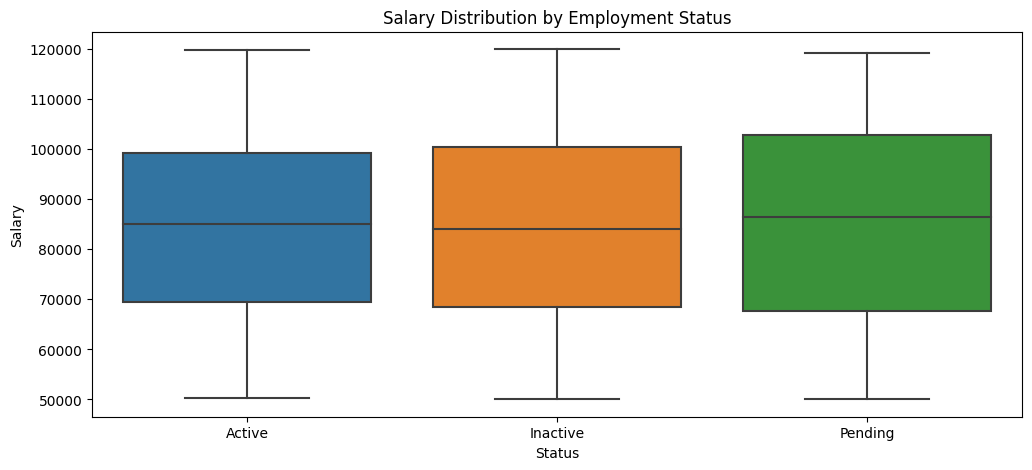

In [33]:
plt.figure(figsize=(12,5))
sns.boxplot(x="Status", y="Salary", data=df_copy)
plt.title("Salary Distribution by Employment Status")
plt.show()


In [34]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Employee_ID             1020 non-null   object        
 1   First_Name              1020 non-null   object        
 2   Last_Name               1020 non-null   object        
 3   Age                     1020 non-null   float64       
 4   Status                  1020 non-null   category      
 5   Join_Date               1020 non-null   datetime64[ns]
 6   Salary                  1020 non-null   float64       
 7   Performance_Score       1020 non-null   category      
 8   Remote_Work             1020 non-null   bool          
 9   Department              1020 non-null   category      
 10  Region                  1020 non-null   category      
 11  Status_code             1020 non-null   int32         
 12  Remote_Work_code        1020 non-null   int32   

In [35]:
#df_copy=df_copy.drop(columns=["Employee_ID","First_Name","Last_Name","Status_code","Remote_Work_code","Performance_Score_code","Department_Code"])

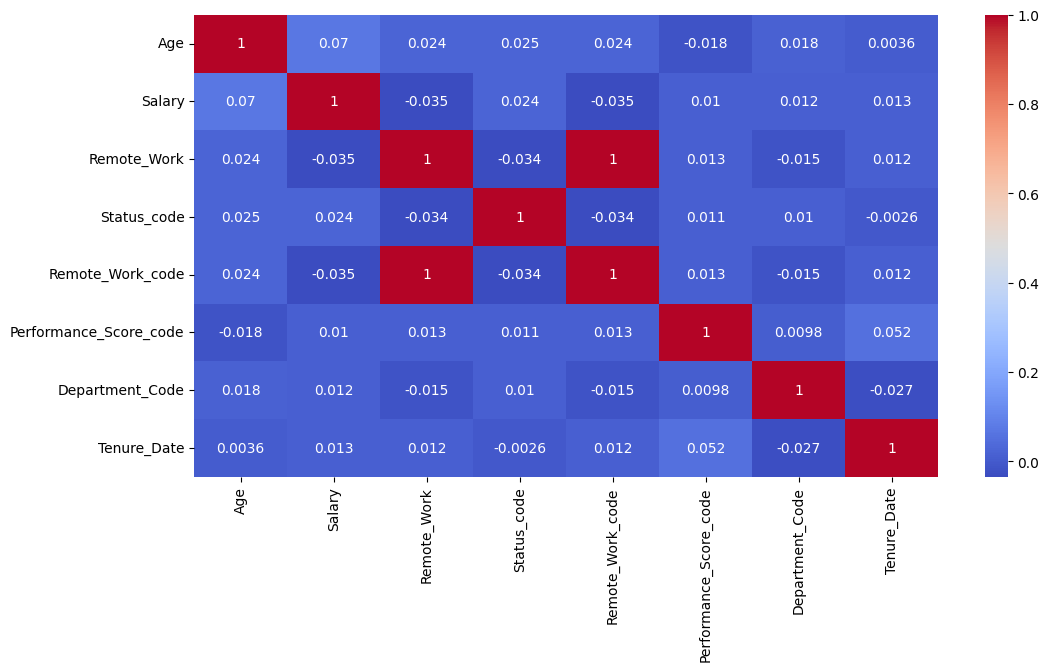

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(df_copy.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

In [37]:
# df_copy.to_csv("data/employee_cleaned.csv")
print("It's a Success")

It's a Success


Training RandomForest...
RandomForest | MAE: 15569.52 | RMSE: 19363.12 | R2: -0.0616
Training XGBRegressor...
XGBRegressor | MAE: 17225.46 | RMSE: 21600.34 | R2: -0.3211
Training CatBoostRegressor...
CatBoostRegressor | MAE: 16805.91 | RMSE: 20829.48 | R2: -0.2285

===== Best Regression Model =====
('RandomForest', {'MAE': 15569.524292115666, 'RMSE': 19363.123267771505, 'R2': -0.06160438669509216})

Best Params after tuning: {'n_estimators': 400, 'min_samples_split': 10, 'max_depth': 5}

Final Tuned RandomForest | MAE: 15603.67 | RMSE: 18832.83 | R2: -0.0043


you have a = 121 check if its a palindrome without using string function ? 



Shape of dataset: (41188, 21)
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.co

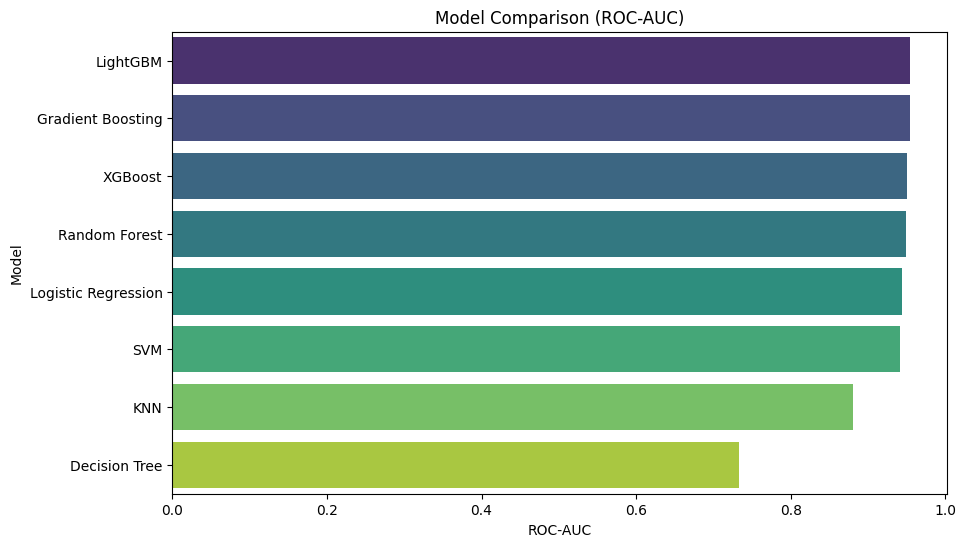


Best Model: LightGBM
[LightGBM] [Info] Number of positive: 4640, number of negative: 36548
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 702
[LightGBM] [Info] Number of data points in the train set: 41188, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112654 -> initscore=-2.063912
[LightGBM] [Info] Start training from score -2.063912


FileNotFoundError: [Errno 2] No such file or directory: 'models/best_model_LightGBM.pkl'

In [1]:
# =========================
# 1. Import Libraries
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import joblib

# =========================
# 2. Load Dataset
# =========================
df = pd.read_csv("data/test.csv", sep=";")

print("Shape of dataset:", df.shape)
print(df.head())

# =========================
# 3. Preprocess
# =========================
X = df.drop("y", axis=1)
y = df["y"].map({"yes":1, "no":0})

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# =========================
# 4. Define Models to Test
# =========================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "SVM": SVC(probability=True, random_state=42, class_weight="balanced"),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

results = []

# =========================
# 5. Train + Evaluate Each Model
# =========================
for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:,1] if hasattr(pipe, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "ROC-AUC": auc
    })

    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", auc)

# =========================
# 6. Compare Models
# =========================
results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
print("\nModel Comparison:\n", results_df)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="ROC-AUC", y="Model", data=results_df, palette="viridis")
plt.title("Model Comparison (ROC-AUC)")
plt.show()

# =========================
# 7. Save Best Model
# =========================
best_model_name = results_df.iloc[0]["Model"]
print("\nBest Model:", best_model_name)

best_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", models[best_model_name])
])

best_model.fit(X, y)  # retrain on full dataset
joblib.dump(best_model, f"models/best_model_{best_model_name.replace(' ','_')}.pkl")
print(f"Saved best model as models/best_model_{best_model_name.replace(' ','_')}.pkl")


✅ Dataset Loaded
Shape: (41188, 21)
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  c

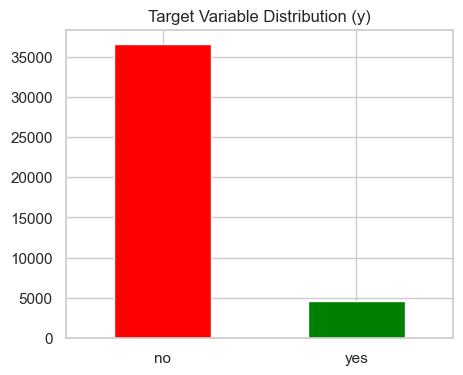

Target distribution:
 no     0.887346
yes    0.112654
Name: y, dtype: float64


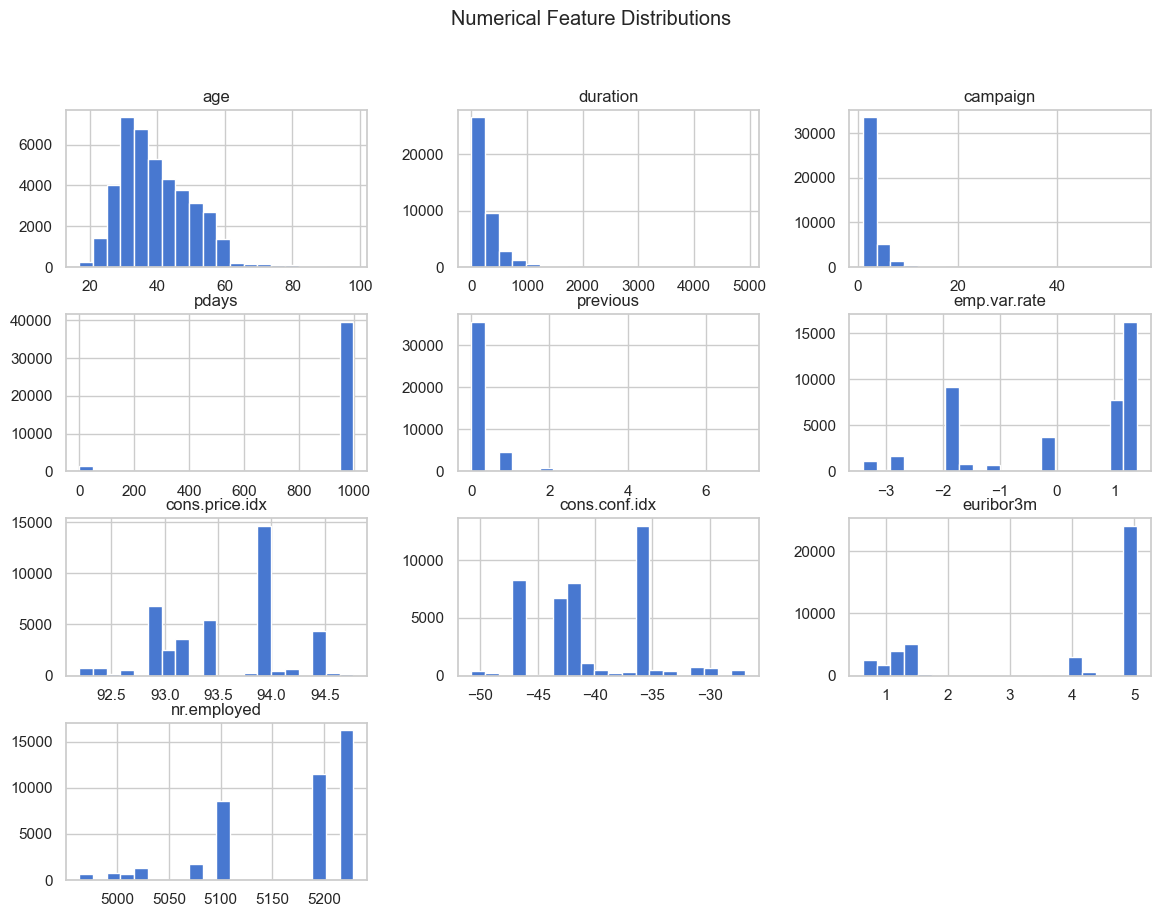

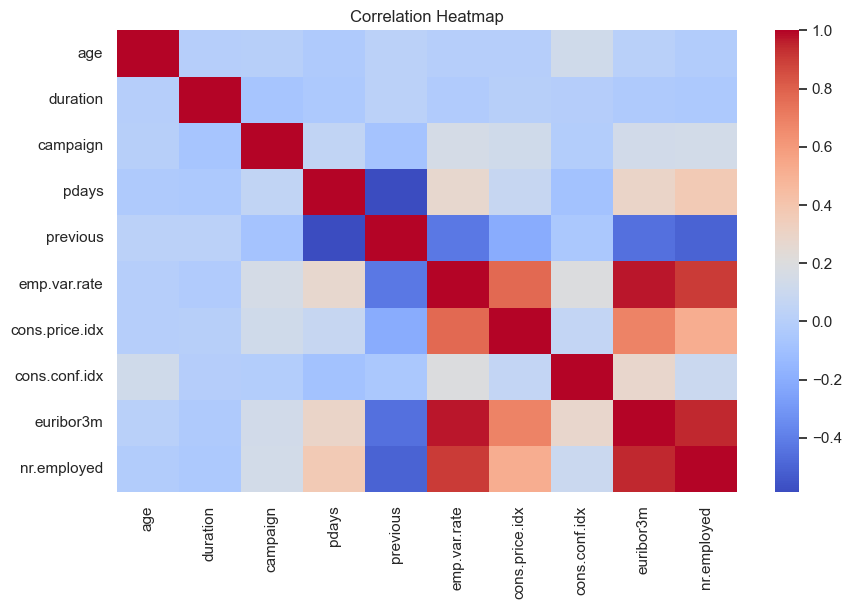


🚀 Training Logistic Regression ...
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7310
           1       0.45      0.91      0.60       928

    accuracy                           0.87      8238
   macro avg       0.72      0.89      0.76      8238
weighted avg       0.93      0.87      0.88      8238

ROC-AUC: 0.9438214951176942

🚀 Training Decision Tree ...
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7310
           1       0.55      0.52      0.53       928

    accuracy                           0.90      8238
   macro avg       0.74      0.73      0.74      8238
weighted avg       0.90      0.90      0.90      8238

ROC-AUC: 0.7324068941931223

🚀 Training Random Forest ...
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.72      0.43      0.54       928

    accuracy                  

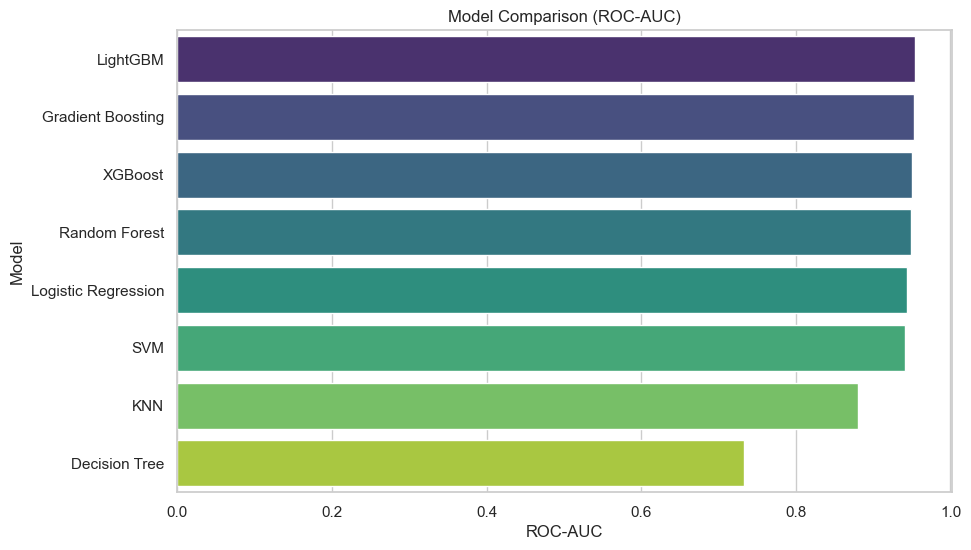

In [2]:
# =========================
# 1. Import Libraries
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid", palette="muted")

# =========================
# 2. Load Dataset
# =========================
df = pd.read_csv("data/test.csv", sep=";")

print("✅ Dataset Loaded")
print("Shape:", df.shape)
print(df.head())
print("\nMissing values:\n", df.isnull().sum())

# =========================
# 3. EDA (Exploratory Data Analysis)
# =========================
# Target distribution
plt.figure(figsize=(5,4))
df["y"].value_counts().plot(kind="bar", color=["red", "green"])
plt.title("Target Variable Distribution (y)")
plt.xticks(rotation=0)
plt.show()
print("Target distribution:\n", df["y"].value_counts(normalize=True))

# Numerical distributions
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols].hist(bins=20, figsize=(14,10))
plt.suptitle("Numerical Feature Distributions")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# =========================
# 4. Preprocessing
# =========================
X = df.drop("y", axis=1)
y = df["y"].map({"yes":1, "no":0})  # convert target

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# =========================
# 5. Define Models
# =========================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42, class_weight="balanced"),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

results = []

# =========================
# 6. Train + Evaluate Models
# =========================
for name, model in models.items():
    print(f"\n🚀 Training {name} ...")
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:,1] if hasattr(pipe, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = classification_report(y_test, y_pred, output_dict=True)["1"]["recall"]
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "Recall (Class=1)": recall,
        "ROC-AUC": auc
    })

    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", auc)

# =========================
# 7. Compare Results
# =========================
results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
print("\n📊 Model Comparison:\n", results_df)

plt.figure(figsize=(10,6))
sns.barplot(x="ROC-AUC", y="Model", data=results_df, palette="viridis")
plt.title("Model Comparison (ROC-AUC)")
plt.show()


[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112656 -> initscore=-2.063898
[LightGBM] [Info] Start training from score -2.063898

Final Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7310
           1       0.68      0.56      0.62       928

    accuracy                           0.92      8238
   macro avg       0.81      0.77      0.79      8238
weighted avg       0.92      0.92      0.92      8238

Final ROC-AUC: 0.9546036959290531


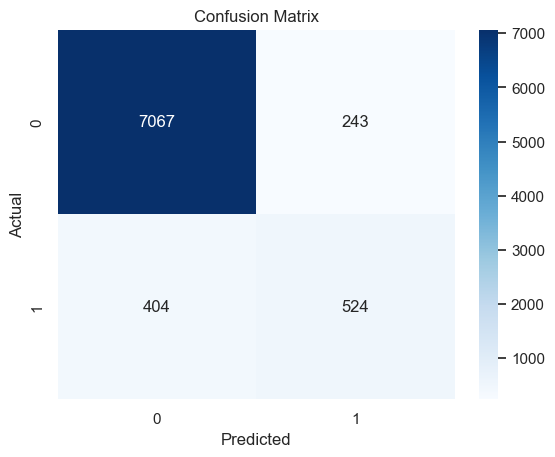

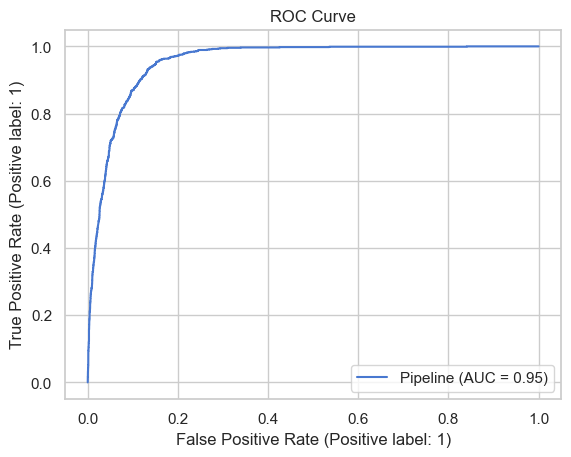


🔮 Sample Predictions:
Row 0: Predicted=0, Probability=0.001
Row 1: Predicted=0, Probability=0.160
Row 2: Predicted=0, Probability=0.303
Row 3: Predicted=0, Probability=0.000
Row 4: Predicted=0, Probability=0.262


In [3]:
# =========================
# 1. Retrain Best Model (LightGBM)
# =========================
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

best_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LGBMClassifier(random_state=42))
])

best_model.fit(X_train, y_train)

# =========================
# 2. Final Evaluation
# =========================
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\nFinal Classification Report:\n")
print(classification_report(y_test, y_pred))
print("Final ROC-AUC:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

# =========================
# 3. Predictions on New Samples
# =========================
sample_data = X_test.head(5)   # take first 5 rows from test
preds = best_model.predict(sample_data)
probs = best_model.predict_proba(sample_data)[:, 1]

print("\n🔮 Sample Predictions:")
for i, (pred, prob) in enumerate(zip(preds, probs)):
    print(f"Row {i}: Predicted={pred}, Probability={prob:.3f}")


In [4]:
print(y.value_counts(normalize=True))


0    0.887346
1    0.112654
Name: y, dtype: float64


In [5]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, cv=5, scoring="roc_auc")
print("Cross-val ROC-AUC scores:", scores)
print("Mean ROC-AUC:", scores.mean())


[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 718
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112656 -> initscore=-2.063898
[LightGBM] [Info] Start training from score -2.063898
[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 61
[LightGBM] [Info] [bin

In [6]:
# =========================
# Stratified CV with LightGBM and Class Weight
# =========================
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support
import numpy as np

# Calculate class weight for LightGBM
pos_weight = int((y == 0).sum() / (y == 1).sum())
print("Positive class weight:", pos_weight)

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

fold = 1
for train_idx, test_idx in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
    
    # Define pipeline
    model = Pipeline([
        ("preprocessor", preprocessor),
        ("lgb", LGBMClassifier(random_state=42, scale_pos_weight=pos_weight))
    ])
    
    # Train
    model.fit(X_train_fold, y_train_fold)
    
    # Predict
    y_pred = model.predict(X_test_fold)
    y_proba = model.predict_proba(X_test_fold)[:,1]
    
    # Metrics
    roc_auc = roc_auc_score(y_test_fold, y_proba)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_fold, y_pred, average='binary')
    
    print(f"Fold {fold}: ROC-AUC={roc_auc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}")
    
    roc_auc_scores.append(roc_auc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    fold += 1

# Average metrics across folds
print("\n✅ Cross-validated Metrics (Mean ± Std):")
print(f"ROC-AUC: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")


Positive class weight: 7
[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112656 -> initscore=-2.063898
[LightGBM] [Info] Start training from score -2.063898
Fold 1: ROC-AUC=0.9491, Precision=0.4781, Recall=0.9041, F1=0.6254
[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Numbe

✅ Best threshold=0.35 with F1=0.6571


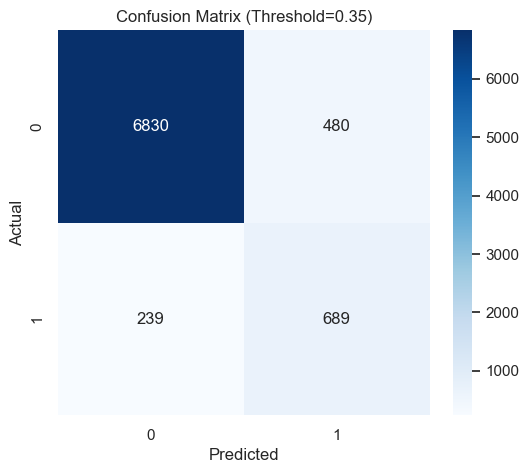

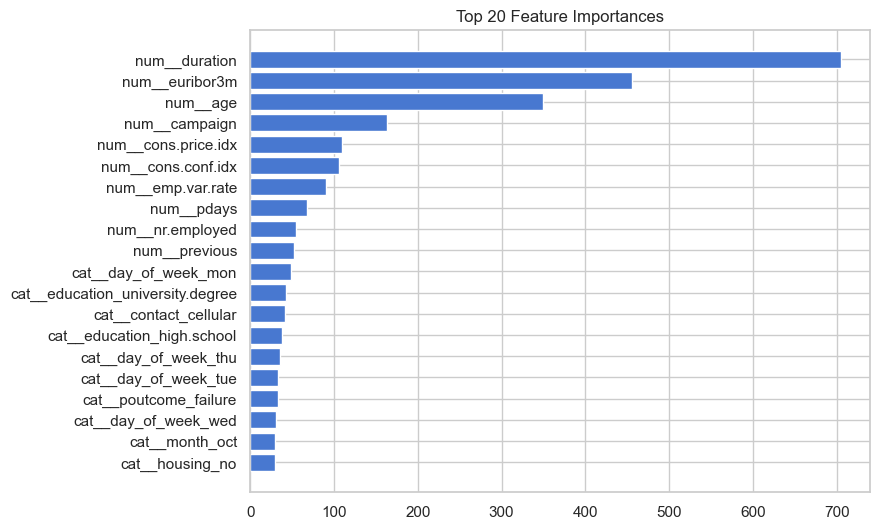

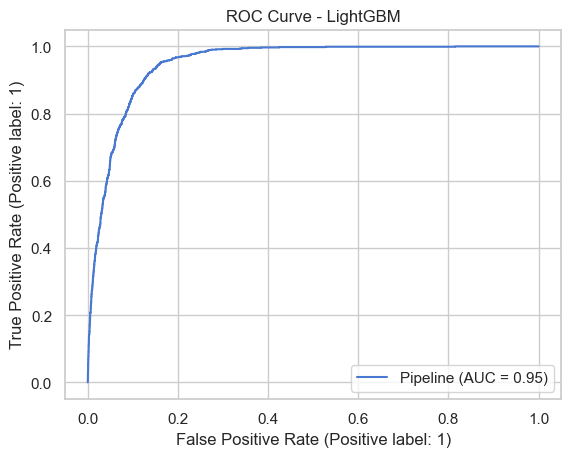

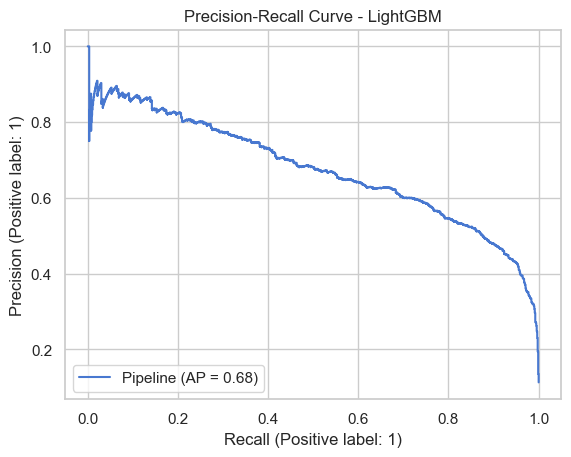


🔮 Sample Predictions (with tuned threshold):
Row 0: Predicted=0, Probability=0.001
Row 1: Predicted=0, Probability=0.160
Row 2: Predicted=0, Probability=0.303
Row 3: Predicted=0, Probability=0.000
Row 4: Predicted=0, Probability=0.331


In [7]:
# =========================
# Portfolio Enhancements - Single Cell
# =========================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay

# -------------------------
# 1. Threshold Tuning
# -------------------------
y_proba = best_model.predict_proba(X_test)[:,1]
thresholds = np.arange(0.1, 0.9, 0.05)
best_thresh = 0.5
best_f1 = 0

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"✅ Best threshold={best_thresh:.2f} with F1={best_f1:.4f}")
y_pred_final = (y_proba >= best_thresh).astype(int)

# -------------------------
# 2. Confusion Matrix (Normalized)
# -------------------------
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix (Threshold={best_thresh:.2f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------
# 3. Feature Importance (Top 20)
# -------------------------
importances = best_model.named_steps['model'].feature_importances_
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
top_idx = importances.argsort()[-20:]

plt.figure(figsize=(8,6))
plt.barh([feature_names[i] for i in top_idx], importances[top_idx])
plt.title("Top 20 Feature Importances")
plt.show()

# -------------------------
# 4. ROC Curve
# -------------------------
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve - LightGBM")
plt.show()

# -------------------------
# 5. Precision-Recall Curve
# -------------------------
PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Precision-Recall Curve - LightGBM")
plt.show()

# -------------------------
# 6. Sample Predictions with Probabilities
# -------------------------
sample_data = X_test.head(5)
probs = best_model.predict_proba(sample_data)[:,1]
y_pred_sample = (probs >= best_thresh).astype(int)

print("\n🔮 Sample Predictions (with tuned threshold):")
for i, (pred, prob) in enumerate(zip(y_pred_sample, probs)):
    print(f"Row {i}: Predicted={pred}, Probability={prob:.3f}")


In [11]:
# =========================
# Interactive Prediction Form in Jupyter
# =========================
import pandas as pd
import numpy as np
from ipywidgets import widgets, VBox, HBox, Button, Output
from IPython.display import display
from sklearn.metrics import accuracy_score

# -------------------------
# 1. Define widgets for all features
# -------------------------
age = widgets.IntText(description='Age:', value=40)
job = widgets.Dropdown(description='Job:', options=df['job'].unique(), value='services')
marital = widgets.Dropdown(description='Marital:', options=df['marital'].unique(), value='married')
education = widgets.Dropdown(description='Education:', options=df['education'].unique(), value='high.school')
default = widgets.Dropdown(description='Default:', options=['yes','no'], value='no')
housing = widgets.Dropdown(description='Housing:', options=['yes','no'], value='yes')
loan = widgets.Dropdown(description='Loan:', options=['yes','no'], value='no')
contact = widgets.Dropdown(description='Contact:', options=df['contact'].unique(), value='telephone')
month = widgets.Dropdown(description='Month:', options=df['month'].unique(), value='may')
day_of_week = widgets.Dropdown(description='Day:', options=df['day_of_week'].unique(), value='mon')
duration = widgets.IntText(description='Duration:', value=180)
campaign = widgets.IntText(description='Campaign:', value=1)
pdays = widgets.IntText(description='Pdays:', value=999)
previous = widgets.IntText(description='Previous:', value=0)
poutcome = widgets.Dropdown(description='Poutcome:', options=df['poutcome'].unique(), value='nonexistent')
emp_var_rate = widgets.FloatText(description='Emp.Var.Rate:', value=1.1)
cons_price_idx = widgets.FloatText(description='Cons.Price.Idx:', value=93.994)
cons_conf_idx = widgets.FloatText(description='Cons.Conf.Idx:', value=-36.4)
euribor3m = widgets.FloatText(description='Euribor3m:', value=4.857)
nr_employed = widgets.FloatText(description='Nr.Employed:', value=5191.0)

# Button & output
predict_btn = Button(description="Predict")
out = Output()

# -------------------------
# 2. Prediction Function
# -------------------------
def predict_customer(b):
    with out:
        out.clear_output()
        # Create DataFrame from input
        sample_input = pd.DataFrame({
            "age": [age.value],
            "job": [job.value],
            "marital": [marital.value],
            "education": [education.value],
            "default": [default.value],
            "housing": [housing.value],
            "loan": [loan.value],
            "contact": [contact.value],
            "month": [month.value],
            "day_of_week": [day_of_week.value],
            "duration": [duration.value],
            "campaign": [campaign.value],
            "pdays": [pdays.value],
            "previous": [previous.value],
            "poutcome": [poutcome.value],
            "emp.var.rate": [emp_var_rate.value],
            "cons.price.idx": [cons_price_idx.value],
            "cons.conf.idx": [cons_conf_idx.value],
            "euribor3m": [euribor3m.value],
            "nr.employed": [nr_employed.value]
        })
        
        # Predict probability
        y_proba = best_model.predict_proba(sample_input)[:,1]
        
        # Apply tuned threshold
        thresholds = np.arange(0.1, 0.9, 0.05)
        best_thresh = 0.5
        best_f1 = 0
        for t in thresholds:
            y_pred_thresh = (best_model.predict_proba(X_test)[:,1] >= t).astype(int)
            f1 = f1_score(y_test, y_pred_thresh)
            if f1 > best_f1:
                best_f1 = f1
                best_thresh = t
        
        y_pred_class = np.where(y_proba >= best_thresh, "Yes", "No")
        
        # Display results
        result_df = sample_input.copy()
        result_df["Predicted Class"] = y_pred_class
        result_df["Probability of Yes"] = y_proba
        display(result_df)
        
        # Accuracy on test set
        y_test_pred = (best_model.predict_proba(X_test)[:,1] >= best_thresh).astype(int)
        accuracy = accuracy_score(y_test, y_test_pred)
        print(f"Model Accuracy on Test Set: {accuracy:.4f}")

# -------------------------
# 3. Link button to function
# -------------------------
predict_btn.on_click(predict_customer)

# -------------------------
# 4. Display Form
# -------------------------
form = VBox([
    HBox([age, job, marital, education]),
    HBox([default, housing, loan, contact]),
    HBox([month, day_of_week, duration, campaign]),
    HBox([pdays, previous, poutcome]),
    HBox([emp_var_rate, cons_price_idx, cons_conf_idx, euribor3m, nr_employed]),
    predict_btn,
    out
])
display(form)


In [12]:
# =========================
# Prediction Output in Words
# =========================
y_proba = best_model.predict_proba(sample_input)[:,1]

# Apply tuned threshold
thresholds = np.arange(0.1, 0.9, 0.05)
best_thresh = 0.5
best_f1 = 0
for t in thresholds:
    y_pred_thresh = (best_model.predict_proba(X_test)[:,1] >= t).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

y_pred_class = "Yes" if y_proba[0] >= best_thresh else "No"

# Print output in sentences
print("🔮 Prediction Result:")
print(f"- The customer is predicted to subscribe: {y_pred_class}")
print(f"- Probability of subscribing: {y_proba[0]:.2f}")
print(f"- Model accuracy on the test set: {accuracy_score(y_test, (best_model.predict_proba(X_test)[:,1] >= best_thresh).astype(int)):.2f}")
print("\n📄 Customer Details:")
for col in sample_input.columns:
    print(f"- {col}: {sample_input[col][0]}")


🔮 Prediction Result:
- The customer is predicted to subscribe: No
- Probability of subscribing: 0.00
- Model accuracy on the test set: 0.91

📄 Customer Details:
- age: 40
- job: services
- marital: married
- education: high.school
- default: no
- housing: yes
- loan: no
- contact: telephone
- month: may
- day_of_week: mon
- duration: 180
- campaign: 1
- pdays: 999
- previous: 0
- poutcome: nonexistent
- emp.var.rate: 1.1
- cons.price.idx: 93.994
- cons.conf.idx: -36.4
- euribor3m: 4.857
- nr.employed: 5191


In [19]:
# =========================
# Interactive Portfolio Prediction
# =========================
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# -------------------------
# 1. Enter new customer details
# -------------------------
new_customer = {
    "age": 35,
    "job": "technician",
    "marital": "single",
    "education": "professional.course",
    "default": "no",
    "housing": "no",
    "loan": "no",
    "contact": "cellular",
    "month": "may",
    "day_of_week": "mon",
    "duration": 500,       # long call
    "campaign": 2,         # number of contacts in this campaign
    "pdays": 10,           # recently contacted
    "previous": 3,         # contacted before
    "poutcome": "success", # previous success
    "emp.var.rate": 1.1,
    "cons.price.idx": 93.994,
    "cons.conf.idx": -36.4,
    "euribor3m": 4.857,
    "nr.employed": 5191
}


# -------------------------
# 2. Convert to DataFrame
# -------------------------
sample_input = pd.DataFrame([new_customer])

# -------------------------
# 3. Predict using the trained model
# -------------------------
# Predict probability
y_proba = best_model.predict_proba(sample_input)[:, 1][0]

# Choose threshold
threshold = 0.5  # Change if you want more aggressive Yes predictions
y_pred_class = "Yes" if y_proba >= threshold else "No"

# Model accuracy on test set
y_test_pred = (best_model.predict_proba(X_test)[:,1] >= threshold).astype(int)
model_acc = accuracy_score(y_test, y_test_pred)

# -------------------------
# 4. Display results
# -------------------------
print("🔮 Prediction Result:")
print(f"- The customer is predicted to subscribe: {y_pred_class}")
print(f"- Probability of subscribing (Yes): {y_proba:.2f}")
print(f"- Model accuracy on the test set: {model_acc:.2f}\n")

print("📄 Customer Details:")
for col in sample_input.columns:
    print(f"- {col}: {sample_input[col][0]}")


🔮 Prediction Result:
- The customer is predicted to subscribe: No
- Probability of subscribing (Yes): 0.10
- Model accuracy on the test set: 0.92

📄 Customer Details:
- age: 35
- job: technician
- marital: single
- education: professional.course
- default: no
- housing: no
- loan: no
- contact: cellular
- month: may
- day_of_week: mon
- duration: 500
- campaign: 2
- pdays: 10
- previous: 3
- poutcome: success
- emp.var.rate: 1.1
- cons.price.idx: 93.994
- cons.conf.idx: -36.4
- euribor3m: 4.857
- nr.employed: 5191
